<font size=5>**ECE143 Project: Prediction and Analysis of Heart Failure** </font>

# <font size=5> 1. Brief Introduction  </font>

<font size =3>Heart failure is a chronic, progressive condition in which the heart muscles are unable to pump enough blood to meet the body’s needs for blood and oxygen. Basically, the heart cannot keep up with its workload and isn’t pumping as well as it should be. Given the df composed of twelve Features, we are going to analyze the factors that lead to heart failure and make the prediction.</font>

# <font size=5> 2. Libraries Used In The Analysis   </font>

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
import plotly.subplots as tls
from plotly.offline import iplot
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


# <font size=5> 3. Exploratory Data Analysis & Visualization </font>

## <font size =4>3.1 Data Overview </font>

In [2]:
df = pd.read_csv('./../data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe().T.style.background_gradient(subset=['mean', 'std','max'], cmap='OrRd')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [4]:
print(df.describe(include=object).T,'\n')
for col in df.select_dtypes(include=object).columns:
  print(f"{col} has {df[col].nunique()} unique values, which are \n{df[col].value_counts()}\n")

               count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460 

Sex has 2 unique values, which are 
M    725
F    193
Name: Sex, dtype: int64

ChestPainType has 4 unique values, which are 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

RestingECG has 3 unique values, which are 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

ExerciseAngina has 2 unique values, which are 
N    547
Y    371
Name: ExerciseAngina, dtype: int64

ST_Slope has 3 unique values, which are 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64



## <font size =4>3.2 Visualization of the Target Variable </font>

In [5]:
print(f"The target variable is HeartDisease. It has {df['HeartDisease'].nunique()} unique variable, which are \n{df['HeartDisease'].value_counts()}")
print(', where 1 indicates \'Got heart disease(s)\' ; 0 indicates \' No heart disease\'.')
hd = df['HeartDisease'].value_counts()
print("\nPercentage of Heart Disease is %s%%"%(round(hd[1]/sum(hd)*100,2)))
print("Percentage of NOT Heart Disease is %s%%"%(round(hd[0]/sum(hd)*100,2)))

The target variable is HeartDisease. It has 2 unique variable, which are 
1    508
0    410
Name: HeartDisease, dtype: int64
, where 1 indicates 'Got heart disease(s)' ; 0 indicates ' No heart disease'.

Percentage of Heart Disease is 55.34%
Percentage of NOT Heart Disease is 44.66%


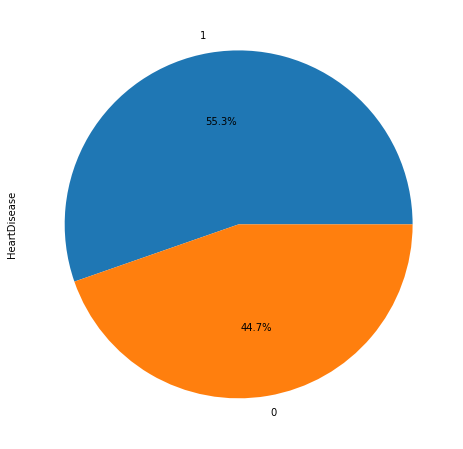

In [6]:
fig, ax = plt.subplots()
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8))
fig.set_facecolor('white')

## <font size =4>3.3 Visualization of Numerical Attritubes </font>

In [7]:
num_index = df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
print("The numerical features are "+", ".join(i for i in num_index)+".")

The numerical features are Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak.


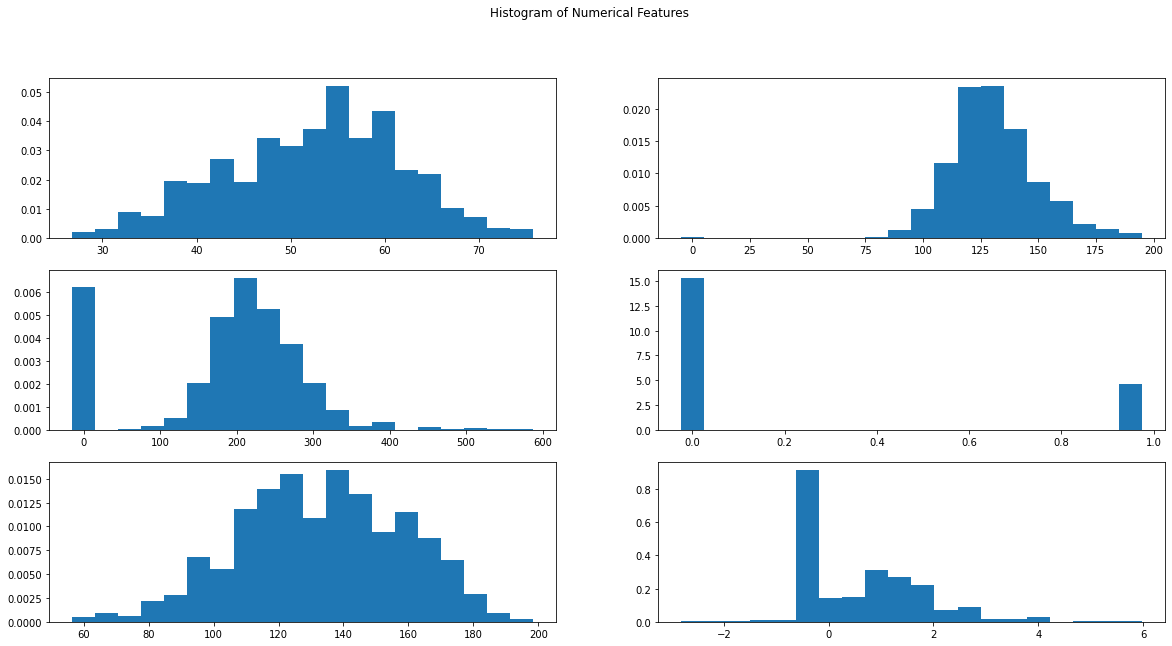

In [8]:

fig, axes = plt.subplots(3,2, figsize=(20,10))
fig.suptitle('Histogram of Numerical Features')
#df_cols= df.columns.values.tolist()
df_cols_num, n_rows, n_cols=0, 3, 2
for row_num in range(n_rows):
    for col_num in range(n_cols):
        axes[row_num, col_num].hist(df[num_index[df_cols_num]], bins=20, density=True,align='left')
        #df.hist(column=num_index[df_cols_num],ax=axes[row_num][col_num])
        df_cols_num+=1

In [9]:
num_index = df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
#df[num_index].iplot(kind='histogram',title='Histogram of Numerical Features',subplots=True,shape=(3,2),bins=50, histnorm='percent',dimensions=(1000,1000),labels=['11'])
fig_hist = tls.make_subplots(rows=2, cols=3,subplot_titles=num_index)
fig_box = tls.make_subplots(rows=2, cols=3,subplot_titles=num_index)
colors_bar=['orange', 'blue','green', 'purple', 'red', 'cyan']
num=0
for i in range(2):
    for j in range(3):
        fig=df[num_index[num]].iplot(kind='hist',bins=50,asFigure=True,colors=colors_bar[num], histnorm='probability density')#(percent:default, probability, density, probability density)
        fig_hist.append_trace(fig['data'][0], i+1, j+1)
        fig=df[num_index[num]].iplot(kind='box',bins=50,asFigure=True,colors=colors_bar[num],boxpoints="all")
        fig_box.append_trace(fig['data'][0], i+1, j+1)
        num+=1
fig_hist.update_layout(height=800, width=1000, title_text="Histograms of Numerical Features")
fig_box.update_layout(height=800, width=1000, title_text="Box Plots of Numerical Features")
fig_hist.show()
fig_box.show()

##  <font size =4>3.4 Visualization of Categorical Features </font>

In [10]:
cat_index = df.select_dtypes('object').columns
print("The categorical features are "+", ".join(i for i in cat_index)+".")

The categorical features are Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope.


In [11]:
df[cat_index].iplot(kind='hist',dimensions=(1000,500), title='Merged Histogram of Categorical Features')
fig_hist = tls.make_subplots(rows=2, cols=3,subplot_titles=cat_index)
fig_box = tls.make_subplots(rows=2, cols=3,subplot_titles=cat_index)
colors_bar=['orange', 'blue','green', 'purple', 'red', 'cyan']
num=0
for i in range(2):
    for j in range(3):
        if i==1 and j==2:
            break
        fig=df[cat_index[num]].iplot(kind='hist',bins=50,asFigure=True,colors=colors_bar[num], histnorm='probability density')#(percent:default, probability, density, probability density)
        fig_hist.append_trace(fig['data'][0], i+1, j+1)
        fig=df[cat_index[num]].iplot(kind='box',bins=50,asFigure=True,colors=colors_bar[num],boxpoints="all")
        fig_box.append_trace(fig['data'][0], i+1, j+1)
        num+=1
fig_hist.update_layout(height=800, width=1000, title_text="Histograms of Categorical Features")
fig_box.update_layout(height=800, width=1000, title_text="Box Plots of Categorical Features")
fig_hist.show()
fig_box.show()

##  <font size =4>3.5 Factors Correlation </font>

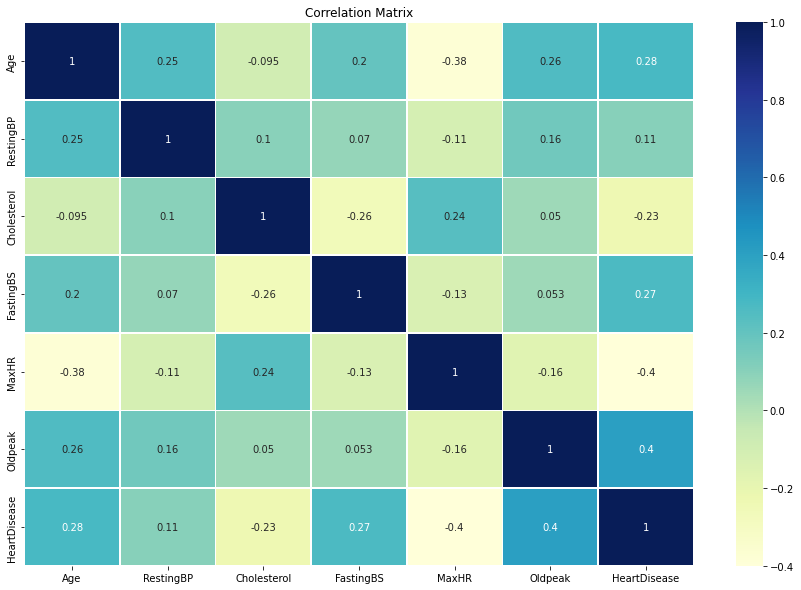

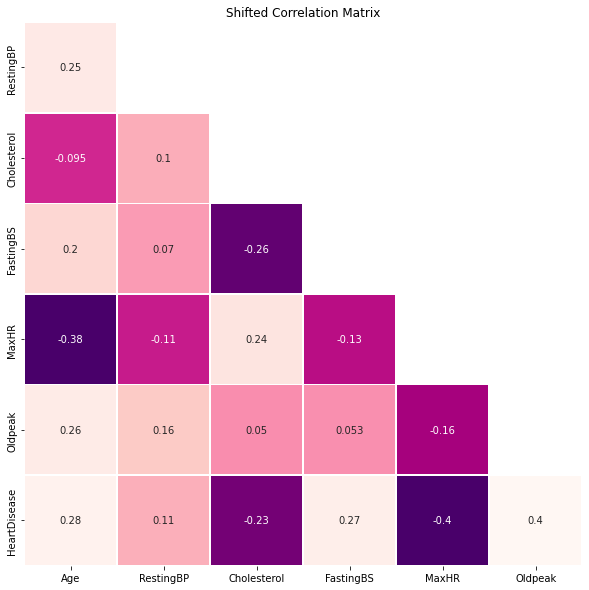

In [12]:
corr = df.corr(method = 'pearson')# std covariance
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr,annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Correlation Matrix')
#label_x = ax.get_xticklabels()
#plt.setp(label_x, rotation=45, horizontalalignment='right')
plt.show()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig,ax=plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr.iloc[1:,:-1],mask=mask[1:,:-1],vmin=-0.3,vmax=0.3,center=0, cmap='RdPu_r',square=False,annot=True,cbar=False,linewidths=.5)
plt.title('Shifted Correlation Matrix')
plt.show()

([<matplotlib.patches.Wedge at 0x29ee0628ba8>,
 [Text(-1.5556349186104046, 1.5556349186104048, 'Flat'),
  Text(1.0205371524351101, -1.9489750948895264, 'Up'),
  Text(2.0997622468997545, -0.6565047650204031, 'Down')],
 [Text(-0.8485281374238569, 0.848528137423857, '75.00%'),
  Text(0.5566566286009691, -1.063077324485196, '15.35%'),
  Text(1.1453248619453207, -0.3580935081929471, '9.65%')])

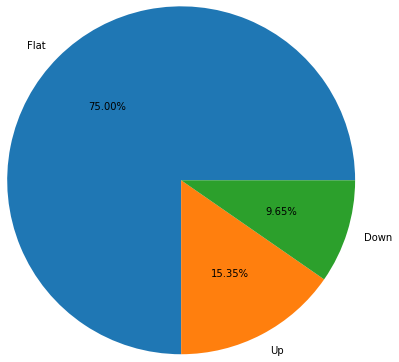

In [13]:
import matplotlib
"""
distribution of each factor for heart failure
"""
heart_failure = df[df.HeartDisease == 1]
pie = heart_failure.ST_Slope.value_counts(normalize=True)
matplotlib.pyplot.pie(pie,labels=['Flat','Up',"Down"],autopct = '%0.2f%%',radius = 2)


### 3.3 Factors bewteen man and woman

In [14]:



"""
group by sex: male, female
"""
df['Sex'].value_counts()
male_data = df[df.Sex == 'M']
female_data = df[df.Sex == 'F']

In [15]:
male_data.info()
female_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             725 non-null    int64  
 1   Sex             725 non-null    object 
 2   ChestPainType   725 non-null    object 
 3   RestingBP       725 non-null    int64  
 4   Cholesterol     725 non-null    int64  
 5   FastingBS       725 non-null    int64  
 6   RestingECG      725 non-null    object 
 7   MaxHR           725 non-null    int64  
 8   ExerciseAngina  725 non-null    object 
 9   Oldpeak         725 non-null    float64
 10  ST_Slope        725 non-null    object 
 11  HeartDisease    725 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 73.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1 to 916
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ag

In [16]:
male_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,53.782069,132.445517,187.513103,0.259310,134.325517,0.945517,0.631724
std,9.397864,18.286739,112.351444,0.438559,25.719191,1.087154,0.482670
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,156.000000,0.000000,117.000000,0.000000,0.000000
50%,55.000000,130.000000,219.000000,0.000000,134.000000,0.800000,1.000000
75%,60.000000,140.000000,261.000000,1.000000,152.000000,1.700000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


In [17]:
female_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,52.492228,132.212435,241.196891,0.134715,146.139896,0.668912,0.259067
std,9.517593,19.392638,85.195441,0.342307,22.154902,0.956865,0.439262
min,30.000000,94.000000,0.000000,0.000000,90.000000,0.000000,0.000000
25%,46.000000,120.000000,204.000000,0.000000,130.000000,0.000000,0.000000
50%,53.000000,130.000000,243.000000,0.000000,150.000000,0.000000,0.000000
75%,60.000000,140.000000,288.000000,0.000000,163.000000,1.100000,1.000000
max,76.000000,200.000000,564.000000,1.000000,192.000000,6.200000,1.000000


### SwarmPlot

### Chest pain Plot

### 

# <font size=4> 4. Prediction </font>